In [54]:
import numpy as np
import torch
import iris
import matplotlib.pyplot as plt
from pytorch_neural import nn_decision_tree  # assuming this is adapted for PyTorch as shown earlier
%matplotlib inline

In [55]:
# Set random seeds for reproducibility
np.random.seed(1943)
torch.manual_seed(1943)

In [65]:
# Load data
x = iris.feature[:, 2:4]  # use "Petal length" and "Petal width" only
y = iris.label
d = x.shape[1]
num_cut = [1, 1]  # "Petal length" and "Petal width"
num_leaf = np.prod(np.array(num_cut) + 1)
num_class = 3
print(x.shape, y.shape, d, num_cut, num_leaf, num_class)

(150, 2) (150, 3) 2 [1, 1] 4 3


In [57]:
# Convert to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [60]:
# Initialize variables
cut_points_list = [torch.nn.Parameter(torch.rand(i)) for i in num_cut]
leaf_score = torch.nn.Parameter(torch.rand(num_leaf, num_class))

# Define loss and optimizer
optimizer = torch.optim.Adam([*cut_points_list, leaf_score], lr=0.1)
loss_fn = torch.nn.CrossEntropyLoss()
loss_function = torch.nn.CrossEntropyLoss()

In [61]:

# Training loop
for i in range(1000):
    optimizer.zero_grad()
    y_pred = nn_decision_tree(x_tensor, cut_points_list, leaf_score, temperature=0.1)
    loss = loss_fn(y_pred, y_tensor)
    loss.backward()
    optimizer.step()

    if i % 200 == 0:
        print(loss.item())
print('error rate %.2f' % (1-np.mean(np.argmax(y_pred.detach().numpy(), axis=1)==np.argmax(y, axis=1))))



1.1217387914657593
0.1531875729560852
0.1473827213048935
0.11906933784484863
0.11849790066480637
error rate 0.04


In [62]:
# Evaluate
with torch.no_grad():
    y_pred_eval = nn_decision_tree(x_tensor, cut_points_list, leaf_score, temperature=0.1)
    error_rate = 1 - (y_pred_eval.argmax(1) == y_tensor.argmax(1)).float().mean()
    print('error rate %.2f' % error_rate)

error rate 0.04


In [63]:
sample_x0 = np.repeat(np.linspace(0, np.max(x[:,0]), 100), 100).reshape(-1,1)
sample_x1 = np.tile(np.linspace(0, np.max(x[:,1]), 100).reshape(-1,1), [100,1])
sample_x = np.hstack([sample_x0, sample_x1])
sample_x_tensor = torch.tensor(sample_x, dtype=torch.float32)

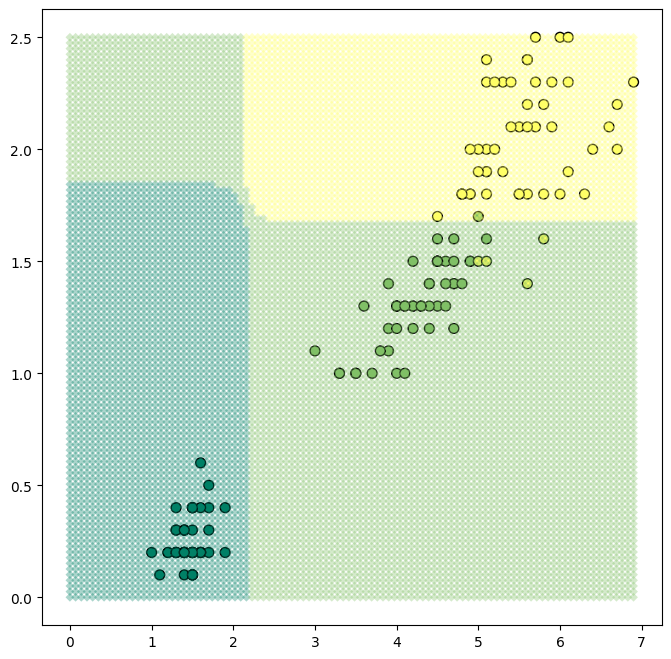

In [64]:
with torch.no_grad():
    sample_label = nn_decision_tree(sample_x_tensor, cut_points_list, leaf_score, temperature=0.1).argmax(1)

plt.figure(figsize=(8,8))
plt.scatter(x[:,0], x[:,1], c=np.argmax(y, axis=1), marker='o', s=50, cmap='summer', edgecolors='black')
plt.scatter(sample_x0.flatten(), sample_x1.flatten(), c=sample_label.numpy().flatten(), marker='D', s=20, cmap='summer', edgecolors='none', alpha=0.33)
plt.show()